<a href="https://colab.research.google.com/github/paulstoy/FluxTowers/blob/main/TowerEnvironment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TowerEnvironment.ipynb

Use this file to perform analyses and create all figures except for the soil texture triangle (written in R) for 'The climate, soils, and distance between eddy covariance towers'.

First, load libraries, and import data from [github](https://github.com/paulstoy/FluxTowers), noting the [ReadMe](https://github.com/paulstoy/FluxTowers/blob/main/README.md) file.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
import geopandas as gpd
import seaborn as sns

a = pd.read_csv('https://raw.githubusercontent.com/paulstoy/FluxTowers/main/Towers.csv')
r = pd.read_csv('https://raw.githubusercontent.com/paulstoy/FluxTowers/main/RandomPoints.csv')
rdepth = pd.read_csv('https://raw.githubusercontent.com/paulstoy/FluxTowers/main/RandomSoilDepth.csv',header=None)
tdepth = pd.read_csv('https://raw.githubusercontent.com/paulstoy/FluxTowers/main/TowerSoilDepth.csv')

Quantify the distance between all towers. This takes awhile, 'distm' from the 'geosphere' package in R is much faster. Skip this chunk if you would rather import its output available on github, which can be loaded using the chunk below this one.

In [ ]:
import geopy.distance

R,C=a.shape

m = np.empty((R,R))

for i in range(0,R):
  print(i)
  for j in range(0,R):
    m[i,j] = geopy.distance.geodesic((a.Lat[i], a.Long[i]),(a.Lat[j], a.Long[j])).km

#trick python into thinking the eigenvalues are impossibly large
m[m==0] = 1e10

#calculate the minimum distance to another tower for each tower site
x = np.min(m,axis=0)

#create a pandas dataframe with rows and columns labeled
m_pd = pd.DataFrame(m, columns=a["Site ID"], index=a["Site ID"])

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

Alternately, load the distance matrix directly from github as a CSV UTF-8 and extract the list of shortest distances, 'x'.

In [ ]:
m_pd = pd.read_csv('https://raw.githubusercontent.com/paulstoy/FluxTowers/main/DistanceMatrix.csv')
mtemp = m_pd
del mtemp['Site ID']
m = np.array(mtemp)
del mtemp
m[m==0] = 1e10
x = np.min(m_pd,axis=0)

#Figure 1:
A map of tower locations, colored by distance to nearest tower

<ipython-input-41-ec9012f6b3ac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d["km"] = x.tolist()
<ipython-input-41-ec9012f6b3ac>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  gpd.datasets.get_path("naturalearth_lowres"))


<Axes: >

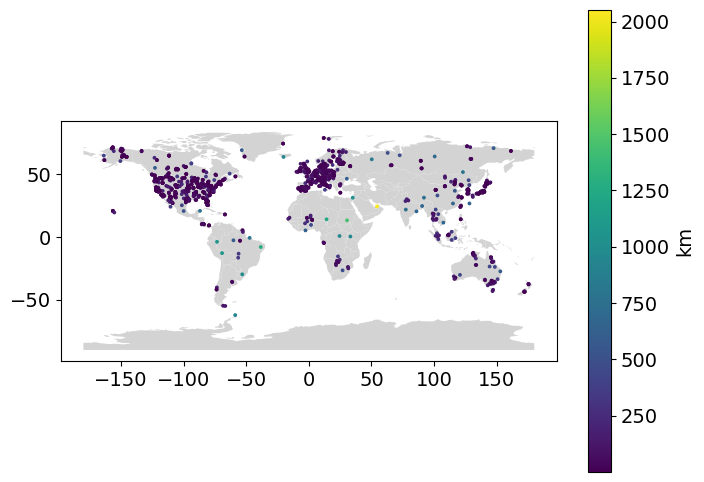

In [ ]:
d = a[["Lat", "Long"]]
#d["Dist (km)"] = np.log(x).tolist()
d["km"] = x.tolist()

countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))

fig, ax = plt.subplots(figsize=(8,6))
countries.plot(color="lightgrey",ax=ax)
d.plot(x="Long", y="Lat", kind="scatter",s=3,xlabel="",ylabel="", c="km",colormap="viridis", ax=ax)

#Figure 2:
Climate and edaphic characteristics compared to dataset pixels that contain eddy covariance towers

(0.0, 1.0, 0.0, 1.0)

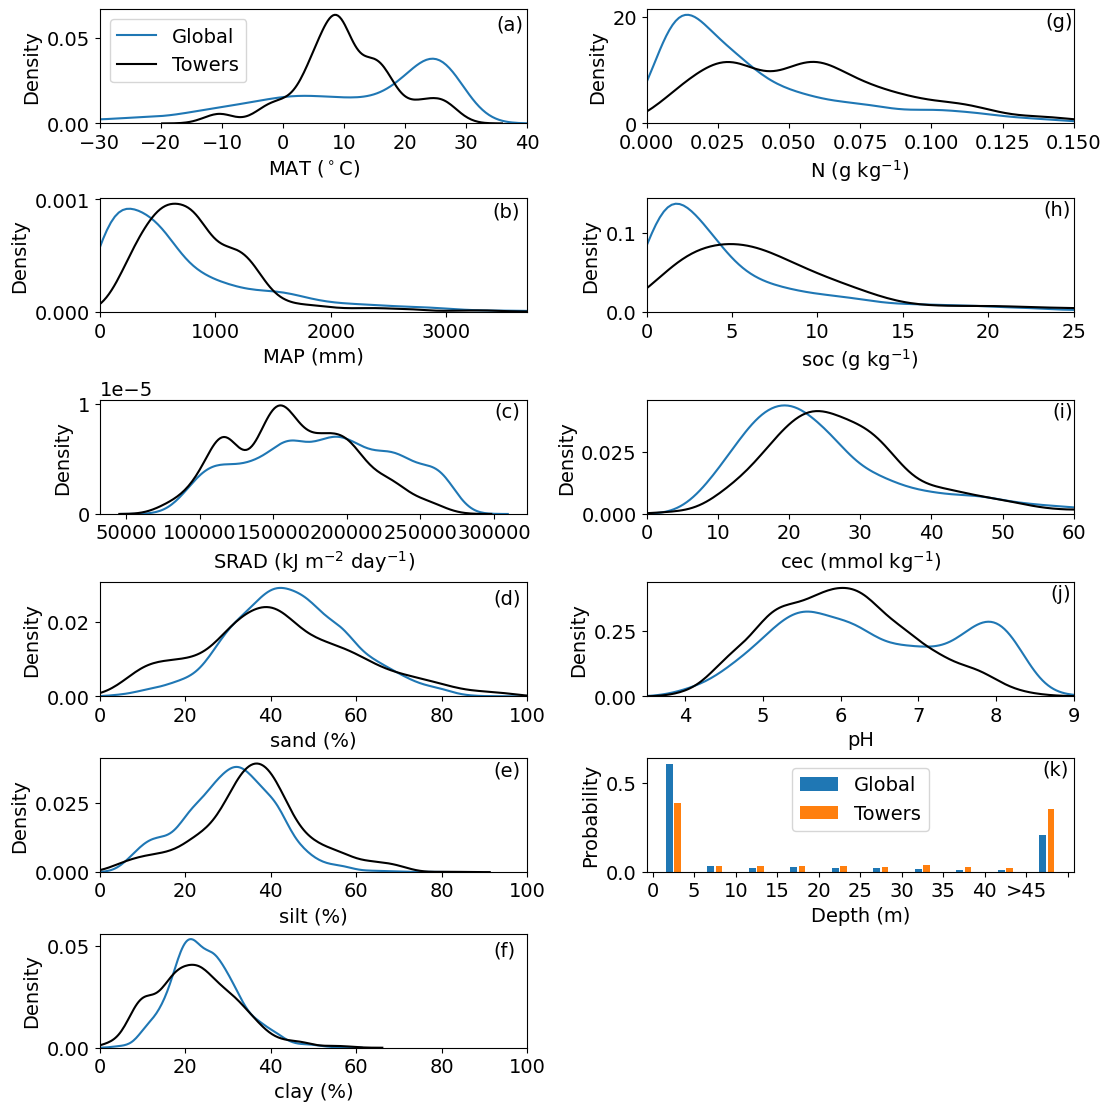

In [ ]:
fig, axs = plt.subplots(6, 2, figsize=(11,11),layout='constrained')
sns.kdeplot(ax=axs[0,0],data=r,x='MAT_ds',label='Global')
sns.kdeplot(ax=axs[0,0],data=a,x='MAT_ds',color='k',label='Towers')
axs[0,0].set(xlabel="MAT ($^\circ$C)", ylabel="Density",xlim=([-30,40]))
axs[0,0].legend()
axs[0,0].text(35,0.055,"(a)")

sns.kdeplot(ax=axs[1,0],data=r,x='MAP_ds')
sns.kdeplot(ax=axs[1,0],data=a,x='MAP_ds',color='k')
axs[1,0].set(xlabel="MAP (mm)", ylabel="Density",xlim=([0,3700]))
axs[1,0].text(3400,0.00085,"(b)")

sns.kdeplot(ax=axs[2,0],data=r,x='SRAD_ds')
sns.kdeplot(ax=axs[2,0],data=a,x='SRAD_ds',color='k')
axs[2,0].set(xlabel="SRAD (kJ m$^{-2}$ day$^{-1}$)", ylabel="Density")
axs[2,0].text(300000,8.8e-6,"(c)")

sns.kdeplot(ax=axs[3,0],data=r,x='sand')
sns.kdeplot(ax=axs[3,0],data=a,x='sand',color='k')
axs[3,0].set(xlabel="sand (%)", ylabel="Density",xlim=([0,100]))
axs[3,0].text(92,.025,"(d)")

sns.kdeplot(ax=axs[4,0],data=r,x='silt')
sns.kdeplot(ax=axs[4,0],data=a,x='silt',color='k')
axs[4,0].set(xlabel="silt (%)", ylabel="Density",xlim=([0,100]))
axs[4,0].text(92,.035,"(e)")

sns.kdeplot(ax=axs[5,0],data=r,x='clay')
sns.kdeplot(ax=axs[5,0],data=a,x='clay',color='k')
axs[5,0].set(xlabel="clay (%)", ylabel="Density",xlim=([0,100]))
axs[5,0].text(92,.045,"(f)")

rplot = rdepth.to_numpy()
tplot = tdepth.depth.to_numpy()

rplot = rplot[rplot!=255]
tplot = tplot[tplot!=255]
tplot = tplot[np.isnan(tplot)==0]

h = np.histogram(rplot)
h0,h1=h

t = np.histogram(tplot)
t0,t1=t

sns.kdeplot(ax=axs[0,1],data=r,x='N')
sns.kdeplot(ax=axs[0,1],data=a,x='N',color='k')
axs[0,1].set(xlabel="N (g kg$^{-1}$)", ylabel="Density",xlim=([0,0.15]))
axs[0,1].text(0.14,18,"(g)")

sns.kdeplot(ax=axs[1,1],data=r,x='soc')
sns.kdeplot(ax=axs[1,1],data=a,x='soc',color='k')
axs[1,1].set(xlabel="soc (g kg$^{-1}$)", ylabel="Density",xlim=([0,25]))
axs[1,1].text(23.2,.122,"(h)")

sns.kdeplot(ax=axs[2,1],data=r,x='cec')
sns.kdeplot(ax=axs[2,1],data=a,x='cec',color='k')
axs[2,1].set(xlabel="cec (mmol kg$^{-1}$)", ylabel="Density",xlim=([0,60]))
axs[2,1].text(57,.039,"(i)")

sns.kdeplot(ax=axs[3,1],data=r,x='pH')
sns.kdeplot(ax=axs[3,1],data=a,x='pH',color='k')
axs[3,1].set(xlabel="pH", ylabel="Density",xlim=([3.5,9]))
axs[3,1].text(8.7,.37,"(j)")

axs[4,1].bar(h1[0:10]+2,h[0]/sum(h[0]),label='Global')
axs[4,1].bar(t1[0:10]+3,t[0]/sum(t[0]),label='Towers')
axs[4,1].set(xlabel="Depth (m)", ylabel="Probability")
axs[4,1].legend(loc='upper center')
axs[4,1].text(47,.55,"(k)")
axs[4,1].set_xticks([0,5,10,15,20,25,30,35,40,45,50], ['0','5','10','15','20','25','30','35','40','>45','']);

axs[-1, -1].axis('off')

#Figure 3:
This is a plot of soil texture triangles that was created in R.

#Figure S1:
The cumulative percentage of ranked distances.

[625. 626.]
[1063.]


Text(0.5, 0, 'Percentage of sites')

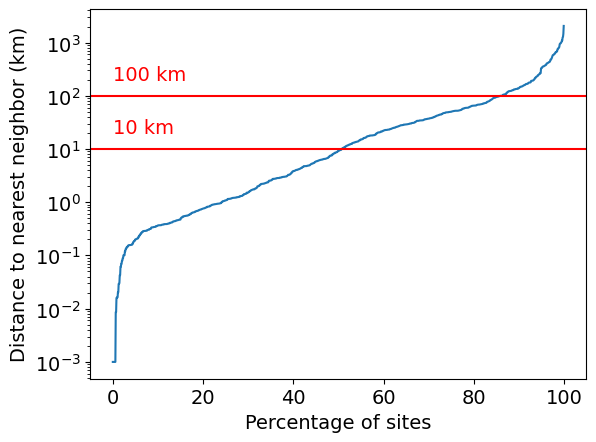

In [ ]:
x[x < 1e-3] = 1e-3 #set sites with < 1 m distance to 1 m; co-located towers would be difficult to position < 1 m apart due to flow distortion
xax = np.arange(0,len(x))/len(x)*100
sortx = np.sort(x)
print(xax[(sortx>9.9) & (sortx < 10.1)]*1233/100)
print(xax[(sortx>99.9) & (sortx < 100.1)]*1233/100)

plt.semilogy(xax,np.sort(x))
plt.axhline(10,xmin=0, xmax=100,color='r')
plt.axhline(100,xmin=0, xmax=100,color='r')
plt.text(0,20,'10 km',color='r')
plt.text(0,200,'100 km',color='r')
plt.ylabel('Distance to nearest neighbor (km)')
plt.xlabel('Percentage of sites')



#Figure S2:
a plot of tower temperature and precipitation against a kernel density estimate of global temperature and precipitation

Text(0, 0.5, 'MAP (mm)')

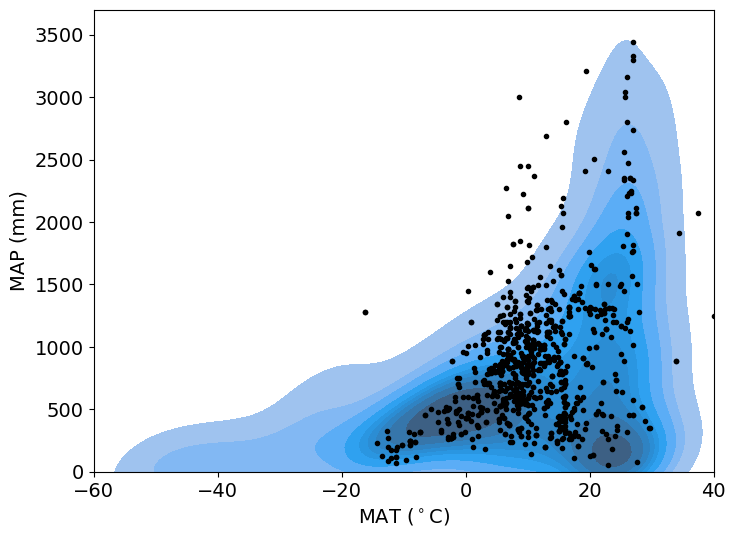

In [ ]:
PTglobal = r[["MAT_ds", "MAP_ds"]]

fig, ax = plt.subplots(figsize=(8,6))
sns.kdeplot(data=PTglobal, x="MAT_ds", y="MAP_ds", fill=True,ax=ax)
plt.plot(a.MAT,a.MAP,'.',color='k')
plt.xlim([-60,40])
plt.ylim([0,3700])
plt.xlabel("MAT ($^\circ$C)")
plt.ylabel("MAP (mm)")

#Analysis: Welch's t-tests for differences between tower locations and global climate, elevation, and soil samples.

In [ ]:
from scipy import stats

alpha = .05/13 #Bonferroni correction
print('alpha:', alpha)

t_stat, p_MAT = stats.ttest_ind(r.dropna()['MAT_ds'], a.dropna()['MAT_ds'])
print('MAT:', p_MAT)

t_stat, p_MAP = stats.ttest_ind(r.dropna()['MAP_ds'], a.dropna()['MAP_ds'])
print('MAP:', p_MAP)

t_stat, p_srad = stats.ttest_ind(r.dropna()['SRAD_ds'], a.dropna()['SRAD_ds'])
print('SRAD:', p_srad)

t_stat, p_elev = stats.ttest_ind(r.dropna()['Elevation_ds'], a.dropna()['Elevation_ds'])
print('elevation:', p_elev)

t_stat, p_clay = stats.ttest_ind(r.dropna()['clay'], a.dropna()['clay'])
print('clay:', p_clay)

t_stat, p_sand = stats.ttest_ind(r.dropna()['sand'], a.dropna()['sand'])
print('sand:', p_sand)

t_stat, p_silt = stats.ttest_ind(r.dropna()['silt'], a.dropna()['silt'])
print('silt:', p_silt)

t_stat, p_bdod = stats.ttest_ind(r.dropna()['bdod'], a.dropna()['bdod'])
print('bdod:', p_bdod)

t_stat, p_cec = stats.ttest_ind(r.dropna()['cec'], a.dropna()['cec'])
print('cec:', p_cec)

t_stat, p_pH = stats.ttest_ind(r.dropna()['pH'], a.dropna()['pH'])
print('pH:', p_pH)

t_stat, p_N = stats.ttest_ind(r.dropna()['N'], a.dropna()['N'])
print('N:', p_N)

t_stat, p_soc = stats.ttest_ind(r.dropna()['soc'], a.dropna()['soc'])
print('soc:', p_soc)

t_stat, p_soildepth = stats.ttest_ind(rplot, tplot)
print('soildepth:', p_soildepth)
print(np.mean(rplot),np.std(rplot))
print(np.mean(tplot),np.std(tplot))


print(np.mean(r.dropna()['bdod']), np.std(r.dropna()['bdod']))
print(np.mean(a.dropna()['bdod']), np.std(a.dropna()['bdod']))


alpha: 0.0038461538461538464
MAT: 4.260127871813577e-10
MAP: 2.098472685530701e-05
SRAD: 8.317254716492318e-14
elevation: 3.1249001190239725e-05
clay: 5.968969506804131e-05
sand: 1.397227394149988e-16
silt: 9.61018367463897e-44
bdod: 0.6700940747651407
cec: 0.0002313147317561226
pH: 1.0599068652130008e-18
N: 1.6708988063885365e-27
soc: 5.581630356369087e-15
soildepth: 2.228030804228418e-37
14.816685801760428 19.966439432132898
24.030578512396694 21.642968216467963
0.011762997562956946 0.00261506283798742
0.01181421143847487 0.002523931716703075
